<a href="https://colab.research.google.com/github/AlyFigueroa/Estad-stica-1-y-2/blob/main/informe_Estadistica_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar librerías necesarias**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer
import io
from google.colab import files

# **Tratamiento de los datos**

## Subir los datos

In [ ]:
# Paso 2: Cargar la base de datos en Google Colab
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


## Cargar los datos


In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(10)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1
11,1,1,1,NaN,1,6,5,2023,2,1,...,1,NaN,1,1,1.0,34,9,5,1.0,1
11,1,1,1,NaN,1,6,5,2023,10,1,...,2,16/05/2021,2,1,1.0,37,10,2,1.0,1
5,172,1,1,NaN,2,6,4,2023,7,1,...,6,08/11/2021,6,2,2.0,24,3,6,1.0,1
5,172,1,1,NaN,1,6,4,2023,10,1,...,4,02/06/2021,4,2,2.0,30,3,8,1.0,1
52,1,1,1,NaN,1,6,5,2023,11,1,...,1,NaN,1,1,1.0,15,4,10,1.0,1
11,1,1,1,NaN,1,7,5,2023,12,1,...,1,NaN,1,1,1.0,39,9,4,1.0,1


## Limpiar datos

In [ ]:
df = tabla[['T_GES', 'TALLA_NAC']].copy()
df = df.dropna()  # Eliminar valores nulos
df_limpio = df[(df['T_GES'] != 9) & (df['TALLA_NAC'] != 9)]
df_limpio.head(4)

# Convertir a object
df_limpio.T_GES= df_limpio.T_GES.astype(str)
df_limpio.TALLA_NAC= df_limpio.TALLA_NAC.astype(str)
df_limpio.TALLA_NAC.head(4)
df_limpio.T_GES.head(4)

# Reemplazar T_GES por descripciones (valores tipo str)
df_limpio.loc[df_limpio['T_GES'] == '1', 'T_GES'] = 'Menos de 22'
df_limpio.loc[df_limpio['T_GES'] == '2', 'T_GES'] = '22 a 27'
df_limpio.loc[df_limpio['T_GES'] == '3', 'T_GES'] = '28 a 37'
df_limpio.loc[df_limpio['T_GES'] == '4', 'T_GES'] = '38 a 41'
df_limpio.loc[df_limpio['T_GES'] == '5', 'T_GES'] = '42 y más'
df_limpio.loc[df_limpio['T_GES'] == '6', 'T_GES'] = 'Ignorado'

# Reemplazar TALLA_NAC por descripciones (valores tipo str)
df_limpio.loc[df_limpio['TALLA_NAC'] == '1', 'TALLA_NAC'] = 'Menos de 20'
df_limpio.loc[df_limpio['TALLA_NAC'] == '2', 'TALLA_NAC'] = '20-29'
df_limpio.loc[df_limpio['TALLA_NAC'] == '3', 'TALLA_NAC'] = '30-39'
df_limpio.loc[df_limpio['TALLA_NAC'] == '4', 'TALLA_NAC'] = '40-49'
df_limpio.loc[df_limpio['TALLA_NAC'] == '5', 'TALLA_NAC'] = '50-59'
df_limpio.loc[df_limpio['TALLA_NAC'] == '6', 'TALLA_NAC'] = '60 y más'


df_limpio.head(4)

<ipython-input-112-871776e14b18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.T_GES= df_limpio.T_GES.astype(str)
<ipython-input-112-871776e14b18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.TALLA_NAC= df_limpio.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
23,38 a 41,50-59
11,38 a 41,40-49
11,38 a 41,40-49
11,38 a 41,50-59


# **Visualizacion de los datos**

## **Grafico de barras**

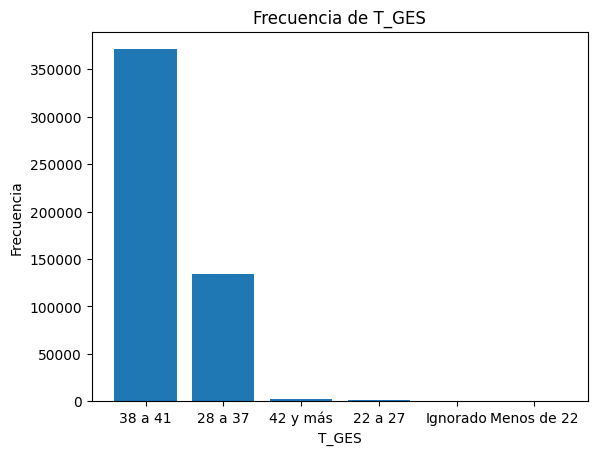

In [ ]:
x_values = df_limpio['T_GES'].unique()
y_values = df_limpio['T_GES'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.xlabel('T_GES')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de T_GES')
plt.show()

La variable T_GES muestra que la mayoría de los nacimientos (más del 70%) ocurren en el rango 38 a 41 semanas (categoría 4), lo cual es típico de una gestación a término. Un 26% corresponde a gestaciones prematuras (categoría 3, 28–37 semanas), mientras que los extremos (categorías 1, 2, 5 y 6) representan una proporción muy baja, indicando que los casos atípicos son poco frecuentes.

## **Grafico circular**

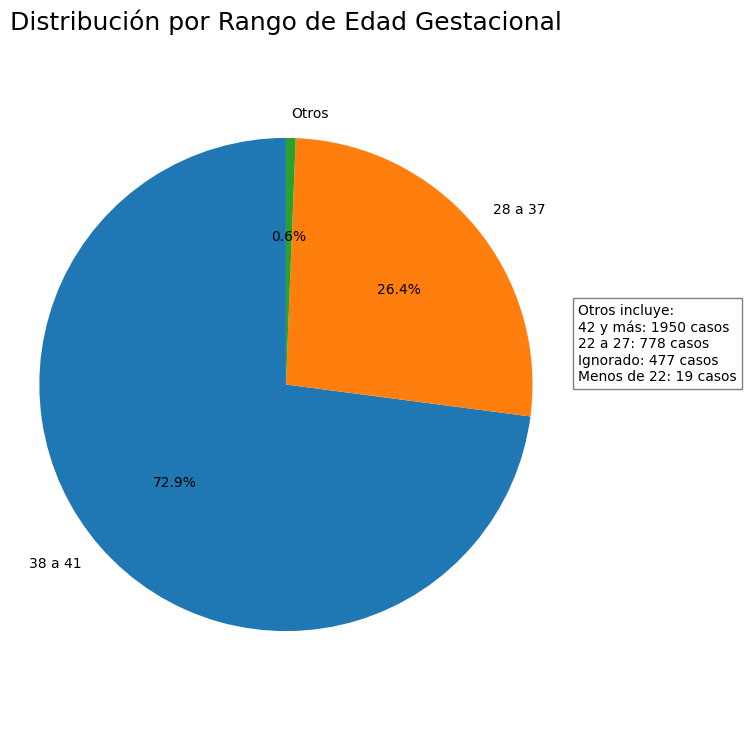

In [ ]:
sizes = np.array(y_values)
# Agrupamos las categorías menores a un umbral (ej. 5%)
umbral = 0.05 * sum(y_values)
x_new = []
y_new = []
otros = {}

for label, value in zip(x_values, y_values):
    if value < umbral:
        otros[label] = value
    else:
        x_new.append(label)
        y_new.append(value)

# Agregar "Otros" al gráfico
x_new.append("Otros")
y_new.append(sum(otros.values()))

# Crear gráfico circular
plt.figure(figsize=(7, 9))
plt.pie(y_new, labels=x_new, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por Rango de Edad Gestacional', fontsize=18)
plt.axis('equal')

# Mostrar leyenda de "Otros"
otros_texto = "\n".join([f"{k}: {v} casos" for k, v in otros.items()])
plt.figtext(0.93, 0.5, f"Otros incluye:\n{otros_texto}", ha="left", fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))

plt.show()
plt.close('all')

El gráfico circular representa la proporción de casos según el rango de edad gestacional (T_GES). Se observa que:


*   "38 a 41 semanas" constituye la gran mayoría con $72.93\%$ de los casos.
*   Le sigue "28 a 37 semanas" con $26.44\%$, representando partos prematuros

*   El gráfico circular representa la proporción de casos según el rango de edad gestacional (T_GES). Se observa que:


Las categorías "42 y más" ($0.38\%$), "22 a 27" ($0.15\%$), "Ignorado" ($0.09\%$) y "Menos de 22" ($0.004\%$) tienen muy poca representación, por lo que fueron agrupadas bajo la etiqueta "Otros" en el gráfico.

Esta agrupación mejora la legibilidad del gráfico sin perder la información relevante, detallada en una leyenda adicional.


# **Analisis de los datos**

## Tabla de contingencia

In [ ]:
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df_limpio.T_GES, df_limpio['TALLA_NAC'])
tabla_contingencia

TALLA_NAC,20-29,30-39,40-49,50-59,60 y más,Menos de 20
T_GES,,,,,,
22 a 27,251,1646,50,1,0,2
28 a 37,44,3357,95455,35657,0,0
38 a 41,0,46,140106,230919,19,0
42 y más,0,0,116,360,1,0
Ignorado,1,17,478,282,0,0
Menos de 22,11,5,0,1,0,2


### **Mapa de calor**

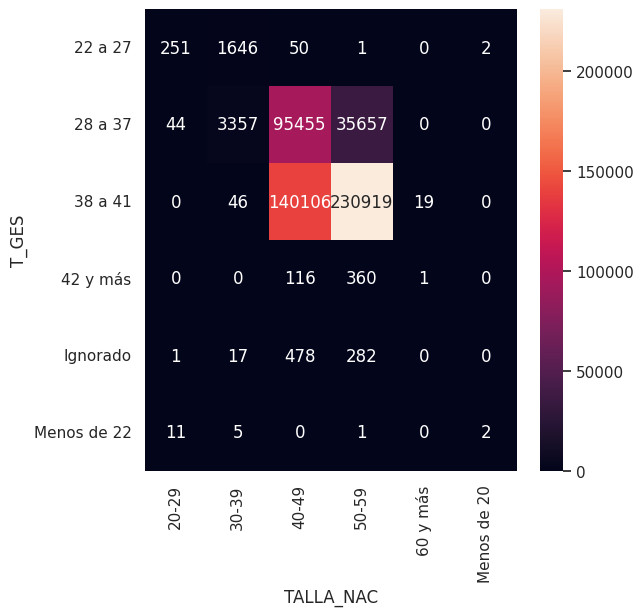

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_contingencia, annot=True, fmt='d', cbar=True)  # Replaced 'char' with 'cbar'
plt.show()

**Relación entre Edad Gestacional y Talla al Nacer**

"""
La tabla muestra cómo se distribuye la talla al nacer según distintos rangos de edad gestacional:

- Los recién nacidos entre **38 a 41 semanas** presentan mayoritariamente tallas entre **40-49 cm (140,106 casos)** y **50-59 cm (230,919 casos)**, lo que concuerda con lo esperado en partos a término.

- Los nacimientos prematuros (**28 a 37 semanas**) tienen una alta concentración en las tallas **30-39 cm (95,455 casos)** y **40-49 cm (35,657 casos)**, reflejando el desarrollo incompleto característico de estos casos.

- En edades gestacionales muy bajas (**22 a 27 semanas** y **menos de 22 semanas**), predominan tallas pequeñas: **30-39 cm** y **20-29 cm**, consistentes con nacimientos extremadamente prematuros.

- La categoría **"42 y más semanas"**, aunque menos frecuente, presenta mayormente tallas en **40-49 cm** y **50-59 cm**, indicando un desarrollo completo o prolongado.

- Las observaciones con **"Ignorado"** en T_GES también reflejan tallas comunes entre **40-49 cm** y **50-59 cm**, aunque representan una pequeña proporción del total.
"""



### **Probabilidad de estar en un grupo**

In [ ]:

# Datos de la tabla (ejemplo simplificado)
data = {
    'T_GES': ['22 a 27', '28 a 37', '38 a 41', '42 y más', 'Ignorado', 'Menos de 22'],
    'Total': [1950, 134513, 371090, 477, 778, 19]
}

total_general = 508827

# Calcular probabilidades
df['Probabilidad'] = df['Total'] / total_general
df['Probabilidad (%)'] = df['Probabilidad'] * 100

df[['T_GES', 'Probabilidad (%)']].round(4)

,T_GES,Probabilidad (%)
0,22 a 27,0.3832
1,28 a 37,26.4359
2,38 a 41,72.9305
3,42 y más,0.0937
4,Ignorado,0.1529
5,Menos de 22,0.0037


**Distribución porcentual de Edad Gestacional (T_GES)**

"""
Esta tabla muestra la probabilidad (en %) de ocurrencia para cada rango de edad gestacional:

- **38 a 41 semanas** representa el grupo más numeroso con un **72.93%**, lo que sugiere que la mayoría de los nacimientos se dan a término.
- **28 a 37 semanas**, con **26.44%**, indica una proporción considerable de partos prematuros.
- Las categorías **"22 a 27"** (0.38%) y **"Menos de 22"** (0.0037%) reflejan nacimientos extremadamente prematuros, de muy baja frecuencia.
- **"42 y más"** (0.09%) agrupa gestaciones prolongadas, también poco comunes.
- **"Ignorado"** (0.15%) indica registros sin datos claros de edad gestacional.

Cuando se cruza esta información con la variable **Talla al Nacer**, se observa que:

- Los nacimientos a término (**38 a 41 semanas**) concentran las mayores tallas (40-59 cm).
- Los partos prematuros (**28 a 37 semanas**) muestran tallas significativamente menores (30-49 cm).
- Las edades gestacionales muy bajas tienden a asociarse con tallas entre 20-39 cm.

Esto evidencia una fuerte relación entre mayor edad gestacional y mayor talla al nacer, como es esperable desde el punto de vista del desarrollo fetal.
"""


## Prueba de Chi-cuadrado

In [ ]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi-cuadrado = {chi2:.2f}")
print(f"Valor-p = {p:.4f}")
print(f"Grados de libertad = {dof}")
if p < 0.05:
    print("Existe una asociación significativa entre T_GES y TALLA_NAC.")
else:
    print("No se evidencia una asociación significativa entre T_GES y TALLA_NAC.")

Chi-cuadrado = 664279.07
Valor-p = 0.0000
Grados de libertad = 36
Existe una asociación significativa entre T_GES y TALLA_NAC.


**Interpretación de la prueba de Chi-cuadrado entre T_GES y TALLA_NAC**

"""
Se realizó una prueba de independencia chi-cuadrado para analizar la relación entre la edad gestacional (T_GES) y la talla al nacer (TALLA_NAC). Los resultados fueron:

- Estadístico $Chi-cuadrado = 664,279.07$
- Valor-$p = 0.0000$
- Grados de libertad = $36$

Dado que el valor-p es menor que 0.05, **rechazamos la hipótesis nula de independencia**. Esto indica que:

 **Existe una asociación estadísticamente significativa entre la edad gestacional y la talla al nacer.**

Es decir, las diferencias observadas en la talla al nacer según los distintos rangos de edad gestacional **no son producto del azar**, sino que **hay una relación real entre ambas variables**. Este resultado es coherente con la expectativa médica: a mayor edad gestacional, mayor desarrollo fetal y, por tanto, mayor talla promedio.
"""


## *(Opcional) Medida de fuerza de asociación: Cramér's V*

In [ ]:
# Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_value = cramers_v(tabla_contingencia)
print(f"Cramér's V = {cramers_v_value:.4f}")
if cramers_v_value   >= 0.3:
    print("Existe una asociación Fuerte entre T_GES y TALLA_NAC.")
elif cramers_v_value  < 0.3 and cramers_v_value  > 0.1:
    print("No se evidencia una asociación moderada entre T_GES y TALLA_NAC.")
else:
    print("No se evidencia una asociación débil entre T_GES y TALLA_NAC.")


Cramér's V = 0.4634
Existe una asociación Fuerte entre T_GES y TALLA_NAC.


**Interpretación del valor de Cramér's V entre T_GES y TALLA_NAC**

"""
Se calculó el valor de Cramér’s V para evaluar la **fuerza de la asociación** entre la edad gestacional (T_GES) y la talla al nacer (TALLA_NAC), obteniéndose:

- Cramér's $V = 0.4634$

Este valor indica una **asociación fuerte** entre ambas variables categóricas.

Mientras la prueba de chi-cuadrado detecta si existe relación significativa, **Cramér’s V cuantifica la magnitud** de dicha relación. En este caso:

La talla al nacer varía fuertemente en función de la edad gestacional, lo cual es consistente con la fisiología del desarrollo fetal.
"""
